In [1]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver import ActionChains
import warnings
warnings.filterwarnings("ignore")
import requests
import re
from selenium.webdriver.common.by import By
import time
import bs4
from bs4 import BeautifulSoup
import urllib
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

Answer of Question No.-1

In [4]:
value=input("Enter your search item here: ")

Enter your search item here: Guitar


Answer of Question No.-2

In [44]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [45]:
driver.get("https://www.amazon.in/")

In [46]:
item=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
item.send_keys("Guitar")

In [47]:
item_click=driver.find_element(By.CLASS_NAME,'nav-right')
item_click.click()

In [48]:
product_urls=[]
start=0
end=3
for page in range(start,end):
    url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        product_urls.append(i.get_attribute("href"))
    n_button=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    n_button.click()
    time.sleep(3)

In [50]:
print(len(product_urls))

156


In [51]:
product_urls

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTozNjcwOTM3MDU1NzgwMzM3OjE2ODcyNzIyMzc6c3BfYXRmOjIwMTIxNzg0MjQwOTk4OjowOjo&url=%2FKadence-Frontier-Acoustic-Guitar-Equalizer%2Fdp%2FB01HRIHJWY%2Fref%3Dsr_1_1_sspa%3Fcrid%3DIMRTA5MOJFJ%26keywords%3DGuitar%26qid%3D1687272237%26sprefix%3Dguitar%252Caps%252C764%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTozNjcwOTM3MDU1NzgwMzM3OjE2ODcyNzIyMzc6c3BfYXRmOjIwMDk2NjA4NzUwNDk4OjowOjo&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB01GDZ46AA%2Fref%3Dsr_1_2_sspa%3Fcrid%3DIMRTA5MOJFJ%26keywords%3DGuitar%26qid%3D1687272237%26sprefix%3Dguitar%252Caps%252C764%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTozNjcwOTM3MDU1NzgwMzM3OjE2ODcyNzIyMzc6c3BfYXRmOjIwMDM2MjI1NzQxMDk4OjowOjo&url=%2FTraveller-Acoustic-Guitar-Strings-Polishing%2Fdp%2FB07RK9962M%2Fref%3Dsr_1_3_sspa%3Fcrid%3DIMRTA5MOJFJ%26keywords%3DGuitar%26qid%3D1

In [53]:
Brand=[]
Product_Name=[]
Price=[]
Return_Exchange=[]
Expected_Delivery=[]
Availability=[]

In [54]:
for url in product_urls:
    driver.get(url)
    time.sleep(3)
    
    try:
        brand=driver.find_elements(By.XPATH,'//span[@class="a-size-base po-break-word"]')
        Brand.append(brand)
    except NoSuchElementException:
        Brand.append('-')
    
    try:
        prod_name=driver.find_elements(By.XPATH,'//span[Qclass="a-size-large product-title-word-break"]')
        Product_Name.append(prod_name)
    except NoSuchElementException:
        Product_Name.append('-')
    
    try:
        price=driver.find_elements(By.XPATH,'//span[@class="a-price aok-align-center reinventPricePriceToPayMargin priceToPay"]/span/span[2]')
        Price.append(price)
    except NoSuchElementException:
        Price.append('-')
    
    try:
        return_exchange=driver.find_elements(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[24]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/span')
        Return_Exchange.append(return_exchange)
    except NoSuchElementException:
        Return_Exchange.append('-')
    
    try:
        expected_delivery=driver.find_elements(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[2]/div[9]/div[1]/div/div/div/span/span')
        Expected_Delivery.append(expected_delivery)
    except NoSuchElementException:
        Expected_Delivery.append('-')
    
    try:
        availability=driver.find_elements(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[4]/div/div[1]/span')
        Availability.append(availability)
    except NoSuchElementException:
        Availability.append('-')

In [55]:
print(len(Brand),len(Product_Name),len(Price),len(Return_Exchange),len(Expected_Delivery),len(Availability),len(product_urls))

156 156 156 156 156 156 156


In [57]:
Guitar_Details=pd.DataFrame({'Brand':Brand,'Product Name':Product_Name,'Price':Price,'Return Exchange':Return_Exchange,'Expected Delivery':Expected_Delivery,'Availability':Availability,'Product urls':product_urls})

In [58]:
Guitar_Details

,Brand,Product Name,Price,Return Exchange,Expected Delivery,Availability,Product urls
0,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
151,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[],[],[],https://www.amazon.in/Epiphone-String-Handed-E...
152,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[],[],[],https://www.amazon.in/JUAREZ-Arp%C3%A9ggio-Aco...
153,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,https://www.amazon.in/Medellin-Acoustic-Guitar...
154,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[],[],[],https://www.amazon.in/Martin-Smith-W-101-SB-PK...


In [59]:
Guitar_Details.to_csv('Q2_Guitar_Details.csv')

Answer of Question No.-3

In [2]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [3]:
driver.get('https://images.google.com/')

In [4]:
search=driver.find_element(By.XPATH,'//*[@id="APjFqb"]')
search.send_keys('fruits')

In [5]:
search=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search.click()

In [6]:
Fruit_Images=[]
Fruit=driver.find_elements(By.XPATH,"//img[contains(@class,'rg_i Q4LuWd')]")
for img in Fruit[0:10]:
    Fruit_Images.append(img.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
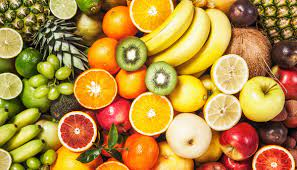
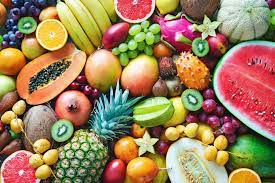
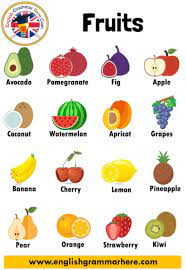
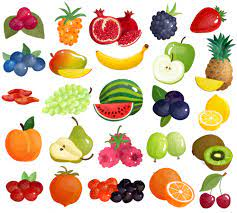
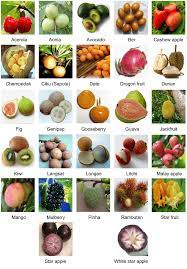
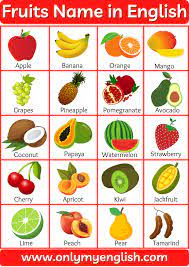
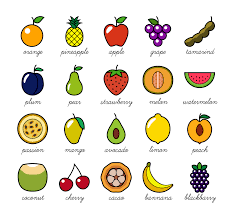
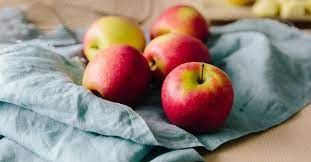
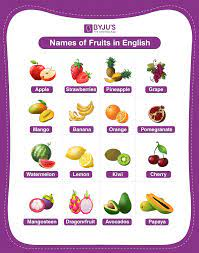
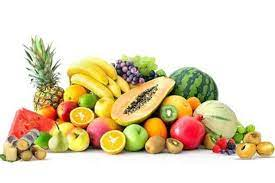

In [7]:
Fruit_Images

In [8]:
fruit_df=pd.DataFrame(Fruit_Images)

In [9]:
fruit_df

,0
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [10]:
fruit_df.to_csv('file1.csv')

In [11]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [12]:
driver.get('https://images.google.com/')

In [13]:
search=driver.find_element(By.XPATH,'//*[@id="APjFqb"]')
search.send_keys('cars')

In [14]:
search=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search.click()

In [15]:
Car_Images=[]
Car=driver.find_elements(By.XPATH,"//img[contains(@class,'rg_i Q4LuWd')]")
for img in Car[0:10]:
    Car_Images.append(img.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
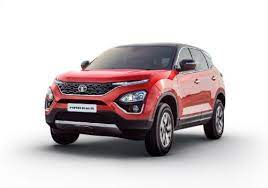
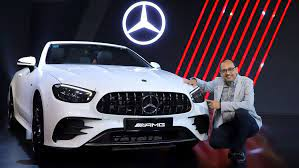
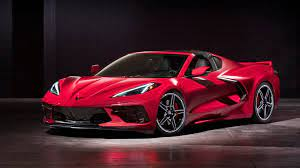
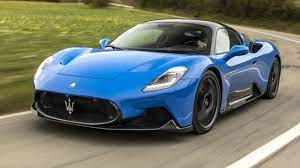
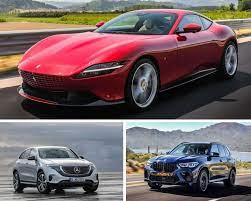
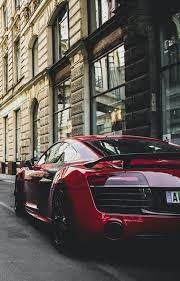
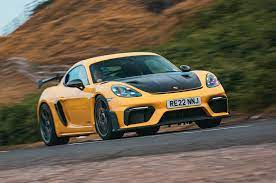
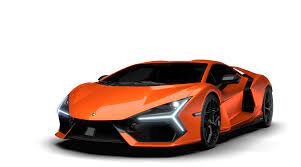
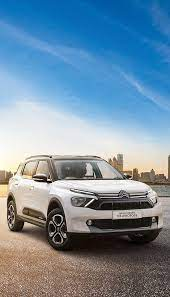
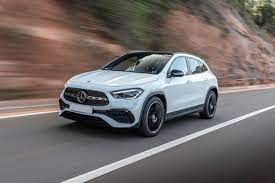

In [16]:
Car_Images

In [17]:
Cardf=pd.DataFrame(Car_Images)

In [18]:
Cardf

,0
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [22]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [23]:
driver.get('https://images.google.com/')

In [25]:
search=driver.find_element(By.XPATH,'//*[@id="APjFqb"]')
search.send_keys('Machine Learning')

In [26]:
search=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search.click()

In [27]:
ML_Images=[]
ML=driver.find_elements(By.XPATH,"//img[contains(@class,'rg_i Q4LuWd')]")
for img in ML[0:10]:
    ML_Images.append(img.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
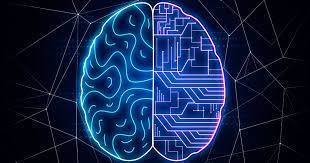
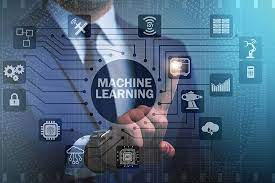
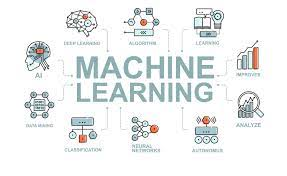
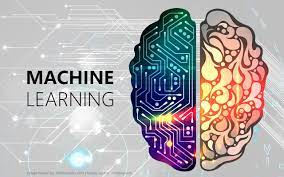
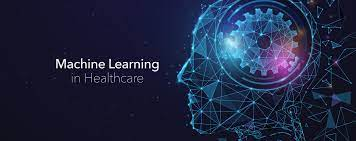
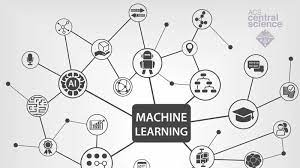
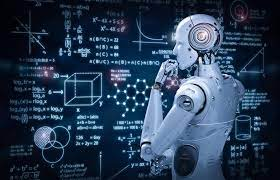
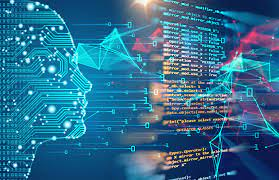
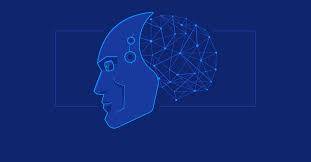
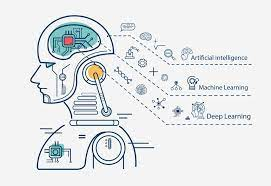

In [28]:
ML_Images

In [29]:
MLdf=pd.DataFrame(ML_Images)

In [30]:
MLdf

,0
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [36]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [37]:
driver.get('https://images.google.com/')

In [38]:
search=driver.find_element(By.XPATH,'//*[@id="APjFqb"]')
search.send_keys('Guitar')

In [39]:
search=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search.click()

In [40]:
Guitar_Images=[]
Guitar=driver.find_elements(By.XPATH,"//img[contains(@class,'rg_i Q4LuWd')]")
for img in Guitar[0:10]:
    Guitar_Images.append(img.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
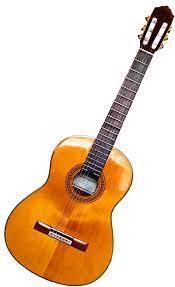
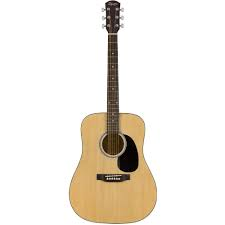
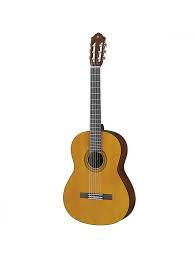
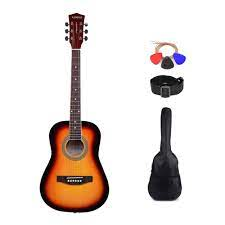
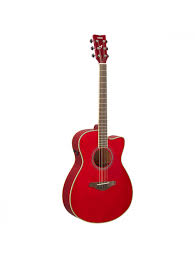
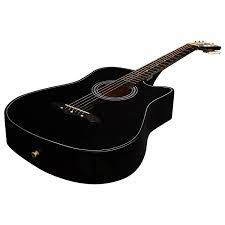
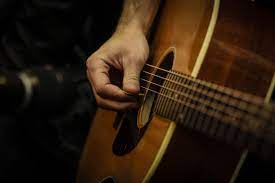
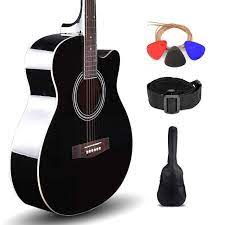
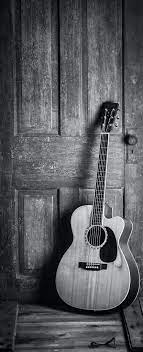
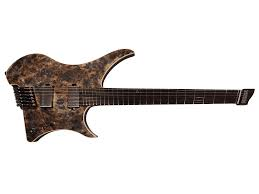

In [41]:
Guitar_Images

In [42]:
Guitardf=pd.DataFrame(Guitar_Images)

In [43]:
Guitardf

,0
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [44]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [45]:
driver.get('https://images.google.com/')

In [46]:
search=driver.find_element(By.XPATH,'//*[@id="APjFqb"]')
search.send_keys('Cakes')

In [47]:
search=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search.click()

In [48]:
Cakes_Images=[]
Cakes=driver.find_elements(By.XPATH,"//img[contains(@class,'rg_i Q4LuWd')]")
for img in Cakes[0:10]:
    Cakes_Images.append(img.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
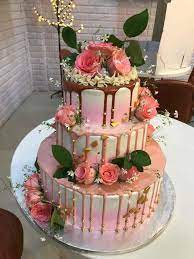
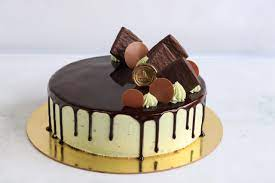
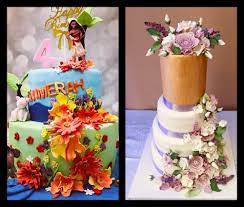
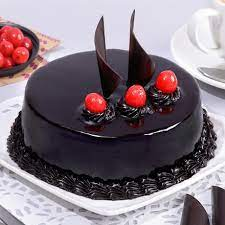
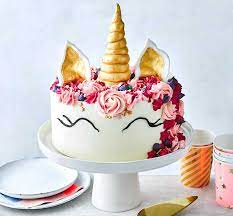
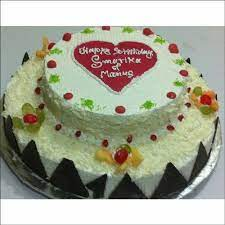
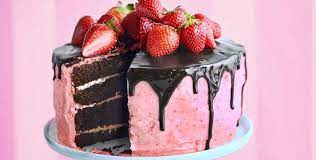
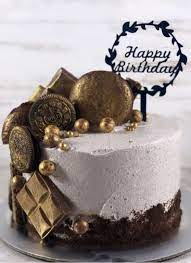
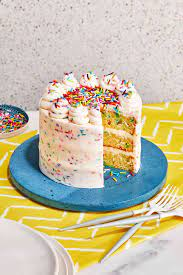
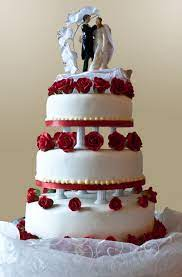

In [49]:
Cakes_Images

In [50]:
Cakesdf=pd.DataFrame(Cakes_Images)

In [51]:
Cakesdf

,0
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [54]:
Google_Images_df=pd.DataFrame({'Fruits':Fruit_Images,'Cars':Car_Images,'Machine Learning':ML_Images,'Guitar':Guitar_Images,'Cakes':Cakes_Images})

In [55]:
Google_Images_df

,Fruits,Cars,Machine Learning,Guitar,Cakes
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [56]:
Google_Images_df.to_csv('Q3_Images.csv')

Answer of Question No.-4

In [15]:
driver=webdriver.Chrome(r'chromedriver.exe')

In [16]:
driver.get('https://www.flipkart.com/')

In [17]:
n=driver.find_element(By.XPATH,'/html/body/div[2]/div/div/button')
n.click()

In [18]:
search_phone=driver.find_element(By.XPATH,'//*[@id="container"]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
search_phone.send_keys('Smarphone')

In [19]:
search_ph=driver.find_element(By.XPATH,'//button[@class="L0Z3Pu"]')
search_ph.click()

In [20]:
url=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
url

[<selenium.webdriver.remote.webelement.WebElement (session="7f489a7367d41e10646f486291e53f02", element="A2153F455CCA3D731B0B7B7B0400F31B_element_160")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7f489a7367d41e10646f486291e53f02", element="A2153F455CCA3D731B0B7B7B0400F31B_element_161")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7f489a7367d41e10646f486291e53f02", element="A2153F455CCA3D731B0B7B7B0400F31B_element_162")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7f489a7367d41e10646f486291e53f02", element="A2153F455CCA3D731B0B7B7B0400F31B_element_163")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7f489a7367d41e10646f486291e53f02", element="A2153F455CCA3D731B0B7B7B0400F31B_element_164")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7f489a7367d41e10646f486291e53f02", element="A2153F455CCA3D731B0B7B7B0400F31B_element_165")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7f489a7367d41e10646f48

In [21]:
urls=[]

In [22]:
for i in url:
    urls.append(i.get_attribute("href"))
print(len(urls))

24


In [23]:
urls

['https://www.flipkart.com/samsung-galaxy-f13-waterfall-blue-128-gb/p/itm85a305642eb7b?pid=MOBGENJWVWYAAVG5&lid=LSTMOBGENJWVWYAAVG5AKPCP0&marketplace=FLIPKART&q=Smarphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=8319e83f-86fa-40a9-b0ad-88b6f66e9054.MOBGENJWVWYAAVG5.SEARCH&ppt=hp&ppn=homepage&ssid=u2a5uxonrk0000001687063280746&qH=d901d3b25745e444',
 'https://www.flipkart.com/poco-c51-royal-blue-64-gb/p/itm1e4e8373537a7?pid=MOBGZCQFCWNDK89P&lid=LSTMOBGZCQFCWNDK89PTMGT86&marketplace=FLIPKART&q=Smarphone&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=8319e83f-86fa-40a9-b0ad-88b6f66e9054.MOBGZCQFCWNDK89P.SEARCH&ppt=hp&ppn=homepage&ssid=u2a5uxonrk0000001687063280746&qH=d901d3b25745e444',
 'https://www.flipkart.com/poco-c55-cool-blue-64-gb/p/itm166c52f5d5dc0?pid=MOBGMXSW55C7ZJE7&lid=LSTMOBGMXSW55C7ZJE7OFBLA7&marketplace=FLIPKART&q=Smarphone&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=organic&iid=8319e83f-86fa-40a

In [24]:
SmartPhone=[]
s_p=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in s_p:
    sp=i.text
    SmartPhone.append(sp)

In [25]:
print(len(SmartPhone))

24


In [26]:
SmartPhone

['Add to Compare\nSAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)\n4.31,51,305 Ratings & 8,644 Reviews\n4 GB RAM | 128 GB ROM | Expandable Upto 1 TB\n16.76 cm (6.6 inch) Full HD+ Display\n50MP + 5MP + 2MP | 8MP Front Camera\n6000 mAh Lithium Ion Battery\nExynos 850 Processor\n1 Year Warranty Provided By the Manufacturer from Date of Purchase\n₹10,699\n₹16,99937% off',
 'Add to Compare\nPOCO C51 (Royal Blue, 64 GB)\n4.315,175 Ratings & 572 Reviews\n4 GB RAM | 64 GB ROM | Expandable Upto 1 TB\n16.56 cm (6.52 inch) HD+ Display\n8MP Dual Rear Camera | 5MP Front Camera\n5000 mAh Battery\nHelio G36 Processor\n1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories\n₹6,999\n₹9,99930% off\nFree delivery by Today\nUpto \n₹6,400\n Off on Exchange\nBank Offer',
 'Add to Compare\nPOCO C55 (Cool Blue, 64 GB)\n4.222,621 Ratings & 1,255 Reviews\n4 GB RAM | 64 GB ROM | Expandable Upto 1 TB\n17.04 cm (6.71 inch) HD+ Display\n50MP Dual Rear Camera | 5MP Front Camera\n5000 mAh

In [27]:
d={'raw_col':SmartPhone}
raw_df=pd.DataFrame(d)

In [28]:
col_names=['Comparision','Brand & Phone Name','Rating & Reviews','Phone Memory','Display Size','Camera','Battery','Processor','Warranty','Price','Delivery']

In [29]:
spdf=pd.DataFrame(columns=col_names)

In [30]:
for index, row in raw_df.iterrows():
    col_items=row['raw_col'].split('\n')
    col_items[1]=col_items[1].split('-')[-1]
    new_row={name: item for name, item in zip(col_names,col_items)}
    spdf=spdf.append(new_row,ignore_index=True)
print(spdf)

       Comparision                           Brand & Phone Name  \
0   Add to Compare  SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)   
1   Add to Compare                 POCO C51 (Royal Blue, 64 GB)   
2   Add to Compare                  POCO C55 (Cool Blue, 64 GB)   
3   Add to Compare                REDMI A1+ (Light Blue, 32 GB)   
4   Add to Compare                 POCO C50 (Royal Blue, 32 GB)   
5   Add to Compare                     REDMI A1+ (Black, 32 GB)   
6   Add to Compare               REDMI A1+ (Light Green, 32 GB)   
7   Add to Compare          MOTOROLA G32 (Mineral Gray, 128 GB)   
8   Add to Compare                POCO C51 (Power Black, 64 GB)   
9   Add to Compare                POCO C55 (Power Black, 64 GB)   
10  Add to Compare       Infinix SMART 7 (Emerald Green, 64 GB)   
11  Add to Compare          Infinix SMART 7 (Azure Blue, 64 GB)   
12  Add to Compare            MOTOROLA e32 (Arctic Blue, 64 GB)   
13  Add to Compare                POCO M4 5G (Cool Blue, 64 GB

In [31]:
spdf

,Comparision,Brand & Phone Name,Rating & Reviews,Phone Memory,Display Size,Camera,Battery,Processor,Warranty,Price,Delivery
0,Add to Compare,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)","4.31,51,305 Ratings & 8,644 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...,"₹10,699","₹16,99937% off"
1,Add to Compare,"POCO C51 (Royal Blue, 64 GB)","4.315,175 Ratings & 572 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,999","₹9,99930% off"
2,Add to Compare,"POCO C55 (Cool Blue, 64 GB)","4.222,621 Ratings & 1,255 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Mediatek Helio G85 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹7,749","₹11,99935% off"
3,Add to Compare,"REDMI A1+ (Light Blue, 32 GB)","42,262 Ratings & 120 Reviews",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,Mediatek Helio A22 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,599","₹10,99940% off"
4,Add to Compare,"POCO C50 (Royal Blue, 32 GB)","4.233,561 Ratings & 1,506 Reviews",2 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",1 Year Manufacturer Warranty for Phone and 6 M...,"₹5,649","₹8,99937% off"
5,Add to Compare,"REDMI A1+ (Black, 32 GB)","42,262 Ratings & 120 Reviews",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,Mediatek Helio A22 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,599","₹10,99940% off"
6,Add to Compare,"REDMI A1+ (Light Green, 32 GB)","42,262 Ratings & 120 Reviews",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,Mediatek Helio A22 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,599","₹10,99940% off"
7,Add to Compare,"MOTOROLA G32 (Mineral Gray, 128 GB)","4.118,985 Ratings & 1,588 Reviews",8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Full HD+ Display,50MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset and 6 Months on Accessories,"₹11,999","₹18,99936% off"
8,Add to Compare,"POCO C51 (Power Black, 64 GB)","4.315,175 Ratings & 572 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,999","₹9,99930% off"
9,Add to Compare,"POCO C55 (Power Black, 64 GB)","4.222,621 Ratings & 1,255 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Mediatek Helio G85 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹7,749","₹11,99935% off"


In [32]:
spdf1=spdf.drop(['Comparision'],axis=1)

In [33]:
spdf2=spdf1.drop(['Rating & Reviews'],axis=1)

In [34]:
spdf2

,Brand & Phone Name,Phone Memory,Display Size,Camera,Battery,Processor,Warranty,Price,Delivery
0,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...,"₹10,699","₹16,99937% off"
1,"POCO C51 (Royal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,999","₹9,99930% off"
2,"POCO C55 (Cool Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Mediatek Helio G85 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹7,749","₹11,99935% off"
3,"REDMI A1+ (Light Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,Mediatek Helio A22 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,599","₹10,99940% off"
4,"POCO C50 (Royal Blue, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",1 Year Manufacturer Warranty for Phone and 6 M...,"₹5,649","₹8,99937% off"
5,"REDMI A1+ (Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,Mediatek Helio A22 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,599","₹10,99940% off"
6,"REDMI A1+ (Light Green, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,Mediatek Helio A22 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,599","₹10,99940% off"
7,"MOTOROLA G32 (Mineral Gray, 128 GB)",8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Full HD+ Display,50MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset and 6 Months on Accessories,"₹11,999","₹18,99936% off"
8,"POCO C51 (Power Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,999","₹9,99930% off"
9,"POCO C55 (Power Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Mediatek Helio G85 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹7,749","₹11,99935% off"


In [35]:
spdf3=spdf2.drop(['Delivery'],axis=1)

In [36]:
spdf3

,Brand & Phone Name,Phone Memory,Display Size,Camera,Battery,Processor,Warranty,Price
0,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,6000 mAh Lithium Ion Battery,Exynos 850 Processor,1 Year Warranty Provided By the Manufacturer f...,"₹10,699"
1,"POCO C51 (Royal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,999"
2,"POCO C55 (Cool Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Mediatek Helio G85 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹7,749"
3,"REDMI A1+ (Light Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,Mediatek Helio A22 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,599"
4,"POCO C50 (Royal Blue, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",1 Year Manufacturer Warranty for Phone and 6 M...,"₹5,649"
5,"REDMI A1+ (Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,Mediatek Helio A22 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,599"
6,"REDMI A1+ (Light Green, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,Mediatek Helio A22 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,599"
7,"MOTOROLA G32 (Mineral Gray, 128 GB)",8 GB RAM | 128 GB ROM,16.64 cm (6.55 inch) Full HD+ Display,50MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 680 Processor,1 Year on Handset and 6 Months on Accessories,"₹11,999"
8,"POCO C51 (Power Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,999"
9,"POCO C55 (Power Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Mediatek Helio G85 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹7,749"


In [37]:
spdf3.to_csv('Q4_SmartPhone.csv')

Answer of Question-5

In [43]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [44]:
driver.get('https://maps.google.com/')

In [45]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div/div[2]/form/input[1]')
search.send_keys("Prayagraj")

In [46]:
click_city=driver.find_element(By.CLASS_NAME,'pzfvzf')
click_city.click()

In [47]:
get_url=driver.current_url

In [48]:
get_url

'https://www.google.com/maps/place/Prayagraj,+Uttar+Pradesh/@25.4021719,81.6367689,11z/data=!3m1!4b1!4m6!3m5!1s0x398534c9b20bd49f:0xa2237856ad4041a!8m2!3d25.4358011!4d81.846311!16zL20vMDIwc2tj?entry=ttu'

In [49]:
lat_lng=re.findall(r'@(.*)data',get_url)

In [61]:
lat_lng

['25.4021719,81.6367689,11z/']

In [65]:
print('Prayagraj City latitude is: ', 25.40, 'And', 'Prayagraj City longitude is: ', 81.64)

Prayagraj City latitude is:  25.4 And Prayagraj City longitude is:  81.64


Answer of Question No.-6

In [66]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [67]:
driver.get('https://www.digit.in/')

In [68]:
search=driver.find_element(By.XPATH,'//span[@class="arrow_down top10"]')
search.click()

In [69]:
search=driver.find_element(By.XPATH,'//div[@class="mega_details  points_sec "]/ul/li[4]/a')
search.click()

In [70]:
product_urls=[]
start=0
end=1
for page in range(start,end):
    url=driver.find_elements(By.XPATH,'//h3[@class="ga-fired"]/a')
    for i in url:
        product_urls.append(i.get_attribute("href"))
    time.sleep(3)

In [71]:
print(len(product_urls))

8


In [72]:
product_urls

['https://www.digit.in/laptops/lenovo-ideapad-gaming-3-ryzen-5-5600h-2021-price-287161.html',
 'https://www.digit.in/laptops/hp-pavilion-ryzen-5-5600h-2022-price-284277.html',
 'https://www.digit.in/laptops/asus-vivobook-gaming-10th-gen-core-i7-10870h-2022-price-287175.html',
 'https://www.digit.in/laptops/hp-pavillion-15-ryzen-5-4600h-2022-price-284319.html',
 'https://www.digit.in/laptops/lenovo-ideapad-gaming-ryzen-5-4600h-price-287189.html',
 'https://www.digit.in/laptops/acer-aspire-7-10th-gen-core-i5-2021-price-253641.html',
 'https://www.digit.in/laptops/msi-gf63-thin-10th-gen-core-i5-10500h-2021-price-253851.html',
 'https://www.digit.in/laptops/asus-tuf-gaming-f15-10th-gen-core-i5-10300h-2021-price-245577.html']

In [79]:
Gaming_Laptop=[]
Market_Status=[]
Release_Date=[]
Official_Website=[]
OS=[]
Display=[]
Processor=[]
Memory=[]

In [80]:
for url in product_urls:
    driver.get(url)
    time.sleep(2)
    
    try:
        brand=driver.find_elements(By.XPATH,'//div[@class="heading-wraper"]/h1')
        Gaming_Laptop.append(brand)
    except NoSuchElementException:
        Gaming_Laptop.append('-')
    
    try:
        m_s=driver.find_elements(By.XPATH,'//div[@class="status_bar"]/div[1]/strong')
        Market_Status.append(m_s)
    except NoSuchElementException:
        Market_Status.append('-')
    
    try:
        r_d=driver.find_elements(By.XPATH,'//div[@class="status_bar"]/div[2]/strong')
        Release_Date.append(r_d)
    except NoSuchElementException:
        Release_Date.append('-')
    
    try:
        o_w=driver.find_elements(By.XPATH,'//div[@class="status_bar"]/div[3]/strong')
        Official_Website.append(o_w)
    except NoSuchElementException:
        Official_Website.append('-')
    
    try:
        o_s=driver.find_elements(By.XPATH,'//div[@class="specs_details "]/ul/li[1]/div/p[2]/strong')
        OS.append(o_s)
    except NoSuchElementException:
        OS.append('-')
    
    try:
        d_p=driver.find_elements(By.XPATH,'//div[@class="specs_details "]/ul/li[2]/div/p[2]/strong')
        Display.append(d_p)
    except NoSuchElementException:
        Display.append('-')
    
    try:
        p_c=driver.find_elements(By.XPATH,'//div[@class="specs_details "]/ul/li[3]/div/p[2]/strong')
        Processor.append(p_c)
    except NoSuchElementException:
        Processor.append('-')
    
    try:
        m_r=driver.find_elements(By.XPATH,'//div[@class="specs_details "]/ul/li[4]/div/p[2]/strong')
        Memory.append(m_r)
    except NoSuchElementException:
        Memory.append('-')

In [82]:
print(len(product_urls),len(Market_Status),len(Release_Date),len(Official_Website),len(OS),len(Display),len(Processor),len(Memory))

8 8 8 8 8 8 8 8


In [83]:
Best_Game_Laptop=pd.DataFrame({'Brand & Product Name':product_urls,'Operating System':OS,'Display':Display,'Processor':Processor,'Memory':Memory,'Market Status':Market_Status,'Release Date':Release_Date,'Official Website':Official_Website})

In [84]:
Best_Game_Laptop

,Brand & Product Name,Operating System,Display,Processor,Memory,Market Status,Release Date,Official Website
0,https://www.digit.in/laptops/lenovo-ideapad-ga...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
1,https://www.digit.in/laptops/hp-pavilion-ryzen...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
2,https://www.digit.in/laptops/asus-vivobook-gam...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
3,https://www.digit.in/laptops/hp-pavillion-15-r...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
4,https://www.digit.in/laptops/lenovo-ideapad-ga...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
5,https://www.digit.in/laptops/acer-aspire-7-10t...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
6,https://www.digit.in/laptops/msi-gf63-thin-10t...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
7,https://www.digit.in/laptops/asus-tuf-gaming-f...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...


Answer of Question No.-7

In [115]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [116]:
driver.get('https://www.forbes.com/')

In [117]:
go=driver.find_element(By.XPATH,'/html/body/div[1]/footer/div[1]/div[1]/a[2]')
go.click()

In [118]:
go1=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/main/div/section/div[2]/div/div/div[1]/div/div[1]/div/div/a/h2')
go1.click()

In [119]:
Rank=[]
rank=driver.find_elements(By.XPATH,'//div[@class="TableRow_rowContainer__IC1Tv"]/div/div[2]/div/div/div[1]')
for i in rank:
    rnk=i.text
    Rank.append(rnk)

In [120]:
Name=[]
name=driver.find_elements(By.XPATH,'//div[@class="TableRow_rowContainer__IC1Tv"]/div/div[2]/div/div/div[2]')
for i in name:
    nm=i.text
    Name.append(nm)

In [121]:
Net_Worth=[]
net_worth=driver.find_elements(By.XPATH,'//div[@class="TableRow_rowContainer__IC1Tv"]/div/div[2]/div/div/div[3]')
for i in net_worth:
    nw=i.text
    Net_Worth.append(nw)

In [122]:
Age=[]
age=driver.find_elements(By.XPATH,'//div[@class="TableRow_rowContainer__IC1Tv"]/div/div[2]/div/div/div[4]')
for i in age:
    ag=i.text
    Age.append(ag)

In [123]:
Country_Territory=[]
c_t=driver.find_elements(By.XPATH,'//div[@class="TableRow_rowContainer__IC1Tv"]/div/div[2]/div/div/div[5]')
for i in c_t:
    ct=i.text
    Country_Territory.append(ct)

In [124]:
Source=[]
sorc=driver.find_elements(By.XPATH,'//div[@class="TableRow_rowContainer__IC1Tv"]/div/div[2]/div/div/div[6]')
for i in sorc:
    sr=i.text
    Source.append(sr)

In [125]:
Industry=[]
inds=driver.find_elements(By.XPATH,'//div[@class="TableRow_rowContainer__IC1Tv"]/div/div[2]/div/div/div[7]')
for i in inds:
    ind=i.text
    Industry.append(ind)

In [126]:
print(len(Rank),len(Name),len(Net_Worth),len(Age),len(Country_Territory),len(Source),len(Industry))

203 202 200 200 200 200 200


In [127]:
rank1=Rank.pop(1)

In [128]:
rank1

'Bernard Arnault oversees the LVMH empire of 75 fashion and cosmetics brands, including Louis Vuitton and Sephora.\nFULL PROFILE'

In [129]:
Rank

['1',
 '',
 'Bernard Arnault oversees the LVMH empire of 75 fashion and cosmetics brands, including Louis Vuitton and Sephora.',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '31',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '41',
 '43',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '65',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '72',
 '74',
 '74',
 '76',
 '77',
 '77',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '84',
 '86',
 '86',
 '88',
 '89',
 '89',
 '89',
 '92',
 '93',
 '94',
 '94',
 '94',
 '97',
 '97',
 '99',
 '100',
 '101',
 '101',
 '103',
 '104',
 '104',
 '106',
 '107',
 '108',
 '108',
 '108',
 '108',
 '112',
 '113',
 '114',
 '115',
 '116',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 

In [131]:
rank2=Rank.pop(1)

In [132]:
Rank

['1',
 'Bernard Arnault oversees the LVMH empire of 75 fashion and cosmetics brands, including Louis Vuitton and Sephora.',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '31',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '41',
 '43',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '65',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '72',
 '74',
 '74',
 '76',
 '77',
 '77',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '84',
 '86',
 '86',
 '88',
 '89',
 '89',
 '89',
 '92',
 '93',
 '94',
 '94',
 '94',
 '97',
 '97',
 '99',
 '100',
 '101',
 '101',
 '103',
 '104',
 '104',
 '106',
 '107',
 '108',
 '108',
 '108',
 '108',
 '112',
 '113',
 '114',
 '115',
 '116',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124'

In [133]:
rank3=Rank.pop(1)

In [134]:
Rank

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '31',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '41',
 '43',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '65',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '72',
 '74',
 '74',
 '76',
 '77',
 '77',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '84',
 '86',
 '86',
 '88',
 '89',
 '89',
 '89',
 '92',
 '93',
 '94',
 '94',
 '94',
 '97',
 '97',
 '99',
 '100',
 '101',
 '101',
 '103',
 '104',
 '104',
 '106',
 '107',
 '108',
 '108',
 '108',
 '108',
 '112',
 '113',
 '114',
 '115',
 '116',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '124',
 '126',
 '127',
 '128',
 '128',
 '130',
 '130',
 '130',
 '133',
 '133',
 '133',
 '136',
 '137',
 '138',
 '13

In [135]:
Name

['Bernard Arnault & family',
 'FULL PROFILE',
 'WEALTH HISTORY',
 'Elon Musk',
 'Jeff Bezos',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Mukesh Ambani',
 'Steve Ballmer',
 'Francoise Bettencourt Meyers & family',
 'Larry Page',
 'Amancio Ortega',
 'Sergey Brin',
 'Zhong Shanshan',
 'Mark Zuckerberg',
 'Charles Koch',
 'Julia Koch & family',
 'Jim Walton',
 'Rob Walton',
 'Alice Walton',
 'David Thomson & family',
 'Michael Dell',
 'Gautam Adani',
 'Phil Knight & family',
 'Zhang Yiming',
 'Dieter Schwarz',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Giovanni Ferrero',
 'Jacqueline Mars',
 'John Mars',
 'Li Ka-shing',
 'Ma Huateng',
 'Miriam Adelson & family',
 'Ken Griffin',
 'Mark Mateschitz',
 'Robin Zeng',
 'Tadashi Yanai & family',
 'Len Blavatnik',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Gianluigi Aponte',
 'Rafaela Aponte-Diamant',
 'Colin Zheng Huang',
 'Reinhold Wuerth & family',
 'Lee Shau Kee',
 

In [136]:
name1=Name.pop(1)

In [137]:
name2=Name.pop(1)

In [138]:
Name

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Mukesh Ambani',
 'Steve Ballmer',
 'Francoise Bettencourt Meyers & family',
 'Larry Page',
 'Amancio Ortega',
 'Sergey Brin',
 'Zhong Shanshan',
 'Mark Zuckerberg',
 'Charles Koch',
 'Julia Koch & family',
 'Jim Walton',
 'Rob Walton',
 'Alice Walton',
 'David Thomson & family',
 'Michael Dell',
 'Gautam Adani',
 'Phil Knight & family',
 'Zhang Yiming',
 'Dieter Schwarz',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Giovanni Ferrero',
 'Jacqueline Mars',
 'John Mars',
 'Li Ka-shing',
 'Ma Huateng',
 'Miriam Adelson & family',
 'Ken Griffin',
 'Mark Mateschitz',
 'Robin Zeng',
 'Tadashi Yanai & family',
 'Len Blavatnik',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Gianluigi Aponte',
 'Rafaela Aponte-Diamant',
 'Colin Zheng Huang',
 'Reinhold Wuerth & family',
 'Lee Shau Kee',
 'Jeff Yass',
 'Jim Simons',
 'Stephe

In [139]:
print(len(Rank),len(Name),len(Net_Worth),len(Age),len(Country_Territory),len(Source),len(Industry))

200 200 200 200 200 200 200


In [140]:
all_billionaires=pd.DataFrame({'Rank':Rank,'Name':Name,'Net Worth':Net_Worth,'Age':Age,'Country/Territory':Country_Territory,'Source':Source,'Industry':Industry})

In [141]:
all_billionaires

,Rank,Name,Net Worth,Age,Country/Territory,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,195,Jin Baofang,$9.6 B,70,China,Solar panels,Energy
196,195,Luo Liguo & family,$9.6 B,67,China,Chemicals,Manufacturing
197,195,Marijke Mars,$9.6 B,58,United States,"Candy, pet food",Food & Beverage
198,195,Pamela Mars,$9.6 B,62,United States,"Candy, pet food",Food & Beverage


In [142]:
all_billionaires.to_csv('Q7_billionaires.csv')

Answer of Question No.-8

In [147]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [148]:
driver.get('https://www.youtube.com/')

In [149]:
go=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-grid-row[4]/div/ytd-rich-item-renderer[2]/div/ytd-rich-grid-media/div[1]/div[2]/div[1]/h3/a/yt-formatted-string')
go.click()

In [198]:
for _ in range(20):
    driver.execute_script("window.scrollBy(0,900000000000000000000000000000000000000000000000000000000000000000000000)")
Person=[]
person=driver.find_elements(By.XPATH,'//span[@class=" style-scope ytd-comment-renderer style-scope ytd-comment-renderer"]')
for i in person:
    per=i.text
    Person.append(per)

In [179]:
for _ in range(20):
    driver.execute_script("window.scrollBy(0,900000000000000000000000000000000000000000000000000000000000000000000000)")
Comments=[]
comment=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]')
for i in comment:
    com=i.text
    Comments.append(com)

In [213]:
Comments.pop(0)

''

In [210]:
print(len(person),len(Comments))

315 315


In [203]:
person=Person[0:315]

In [206]:
Upvote=upvote[0:315]

In [218]:
person1=person[0:313]

In [223]:
youtube_comments=pd.DataFrame({'Person Name':person1,'Comments':Comments})

In [224]:
youtube_comments

,Person Name,Comments
0,Rohit,किस किस को lgta h ki gadar 2 me amresh puri को...
1,Vednath Jogi,Sunny Deol is not just an actor he is emotions️
2,hiral_patel,जो इस वक मेरा कोमेट पढ रहा है ! उसके माता પિता...
3,Prasad Sinha,What a masterpiece
4,Manish bhai 91,गदर 2 मूवी का इंतजार कीन कीन भाईयों को था लाइक...
...,...,...
308,Tulsi Kumari,Gadar 2 Upload Karo Please Sir Ji
309,Bittu Kumar,🇮🇪🇮🇪🇮🇪🇮🇪🇮🇪🇮🇪🇮🇪🇮🇪🇮🇪
310,PREETI BHATT,Gaddar 2 bhaiya
311,Bhanu Singh Khichi,"ये तो गदर 1 है, गदर-2 नहीं है भाई"


Answer of Question No.-9

In [2]:
driver=webdriver.Chrome(r"chromedriver.exe")

In [3]:
driver.get('https://www.hostelworld.com/')

In [6]:
search_city=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input')
search_city.click()

In [8]:
search_city=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input')
search_city.send_keys("London")

In [10]:
london_city=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]/div')
london_city.click()

In [12]:
n_button=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[6]/button')
n_button.click()

In [28]:
hostel_urls=[]
start=0
end=2
for page in range(start,end):
    url=driver.find_elements(By.XPATH,'//div[@class="property"]/div/h2/a')
    for i in url:
        hostel_urls.append(i.get_attribute("href"))
    time.sleep(3)
    n_button=driver.find_element(By.XPATH,'//div[@class="pagination-item"]')
    n_button.click()
    break

In [29]:
hostel_urls

['https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s-City-Hostel-London/London/88047?from=2023-06-21&to=2023-06-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2023-06-21&to=2023-06-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Urbany-Hostel-London/London/303427?from=2023-06-21&to=2023-06-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/NX-London-Hostel/London/15204?from=2023-06-21&to=2023-06-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2023-06-21&to=2023-06-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Elephant-Castle/London/55551?from=2023-06-21&to=2023-06-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Phoenix-Hostel/London/48221?from=2023-06-21&to=2023-06-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Kensington-Holland-Park/London/93920?f

In [35]:
Hostel_Name=[]
Distance=[]
Rating=[]
Reviews=[]
Private_Price=[]
Dorm_Price=[]
Facility=[]
Property_Description=[]

In [37]:
for url in hostel_urls:
    driver.get(url)
    time.sleep(2)
    
    try:
        name=driver.find_elements(By.XPATH,'//div[@class="title-2"]')
        Hostel_Name.append(name)
    except NoSuchElementException:
        Hostel_Name.append('-')
    
    try:
        distance=driver.find_elements(By.XPATH,'//span[@class="description"]/span')
        Distance.append(distance)
    except NoSuchElementException:
        Distance.append('-')
    
    try:
        rating=driver.find_elements(By.XPATH,'//div[@class="score orange big"]')
        Rating.append(rating)
    except NoSuchElementException:
        Rating.append('-')
    
    try:
        reviews=driver.find_elements(By.XPATH,'//div[@class="summary orange"]/div[2]')
        Reviews.append(reviews)
    except NoSuchElementException:
        Reviews.append('-')
    
    try:
        reviews=driver.find_elements(By.XPATH,'//div[@class="summary orange"]/div[1]')
        Reviews.append(reviews)
    except NoSuchElementException:
        Reviews.append('-')
    
    try:
        private_price=driver.find_elements(By.XPATH,'//div[@class="price title-5"]')
        Private_Price.append(private_price)
    except NoSuchElementException:
        Private_Price.append('-')
    
    try:
        dorm_price=driver.find_elements(By.XPATH,'//div[@class="price-col"][2]/div')
        Dorm_Price.append(dorm_price)
    except NoSuchElementException:
        Dorm_Price.append('-')
    
    try:
        facility=driver.find_elements(By.XPATH,'//div[@data-v-4d763f34]')
        Facility.append(facility)
    except NoSuchElementException:
        Facility.append('-')
    
    try:
        property_description=driver.find_elements(By.XPATH,'//div[@class="content collapse-content"]')
        Property_Description.append(property_description)
    except NoSuchElementException:
        Property_Description.append('-')

In [38]:
print(len(Hostel_Name),len(Distance),len(Rating),len(Reviews),len(Private_Price),len(Dorm_Price),len(Facility),len(Property_Description))

30 30 30 60 30 30 30 30


In [39]:
Reviews1=Reviews[0:30]

In [40]:
print(len(Hostel_Name),len(Distance),len(Rating),len(Reviews1),len(Private_Price),len(Dorm_Price),len(Facility),len(Property_Description))

30 30 30 30 30 30 30 30


In [41]:
London_Hostels=pd.DataFrame({'Hostel Name':Hostel_Name,'Distance':Distance,'Rating':Rating,'Reviews':Reviews1,'Private Room Price':Private_Price,'Dorm Room Price':Dorm_Price,'Facility':Facility,'Property Description':Property_Description})

In [42]:
London_Hostels

,Hostel Name,Distance,Rating,Reviews,Private Room Price,Dorm Room Price,Facility,Property Description
0,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
1,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
2,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
3,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
4,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
5,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
6,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
7,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
8,[<selenium.webdriver.remote.webelement.WebElem...,[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...
9,[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[],[],[<selenium.webdriver.remote.webelement.WebElem...,[<selenium.webdriver.remote.webelement.WebElem...


In [43]:
London_Hostels.to_csv('Q9_London_Hostels.csv')